In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Distance euclidienne

In [85]:
def calcul_moyenne(X):
    return np.array([np.array(X[X['y']==i][['x1','x2']].mean()) for i in range(1,6)])

In [87]:
def calcul_cov(X):
     return np.array([np.cov(np.array(X[X['y']==i][['x1','x2']]).T) for i in range(1,6)])

In [214]:
data1=pd.read_csv('data/data_tp1_app.txt',names=['y','x1','x2'],sep=" ")
test=pd.read_csv('data/data_tp1_dec.txt',names=['y','x1','x2'],sep=" ")
u=calcul_moyenne(data1)
cov=calcul_cov(data1)

In [95]:
def predi_distance_euclidien(x):
    dist=np.array([np.linalg.norm(x-u[i]) for i in range(5)])
    top1=np.argmin(dist)  
    dist[top1]=max(dist)+1 #je remplace la valeur de top1 par max+1 pour l'exclure
    top2=np.argmin(dist) #je recupere le nouveau top1(qui est en realite le top2)
    return top1+1,top2+1

In [97]:
def predi_distance_mahanalobis(x):
     dist=[(x-u[i]).T@np.linalg.inv(cov[i])@(x-u[i])+np.log(np.linalg.det(cov[i])) for i in range(5)]
     top1=np.argmin(dist)  
     dist[top1]=max(dist)+1 #je remplace la valeur de top1 par max+1 pour l'exclure
     top2=np.argmin(dist) #je recupere le nouveau top1(qui est en realite le top2)
     return top1+1,top2+1

In [178]:
def plot_decision_multi(x1_min, x1_max, x2_min, x2_max, prediction,parametrique=True sample = 300):
    x1_list = np.linspace(x1_min, x1_max, sample)
    x2_list = np.linspace(x2_min, x2_max, sample)
    if parametrique=True:
        y_grid_pred = [[prediction(np.array([x1,x2]))[0] for x1 in x1_list] for x2 in x2_list] 
    else:
        
    l = np.shape(np.unique(y_grid_pred))[0] - 1
    plt.contourf(x1_list, x2_list, y_grid_pred, levels=l, colors=plt.rcParams['axes.prop_cycle'].by_key()['color'], alpha=0.35)

In [180]:
def visualisation(train,test,methode,parametrique):
    test=test[['x1','x2']]
    if parametrique=True:
        y_pred=[methode(test,i)[0] for i in test.values.tolist()]
    else:
         y_pred=[methode(train,test,i)[0] for i in test.values.tolist()]
    test['y_predi']=y_pred
    for label in range(1,6):
        plt.scatter(test[test['y_predi']== label]['x1'], test[test['y_predi']== label]['x2'], label=label)
    plt.legend()
    plot_decision_multi(test['x1'].min(),test['x1'].max(),test['x2'].min(),test['x2'].max(),prediction=methode,parametrique=parametrique)
    plt.axis('equal')
    plt.show()

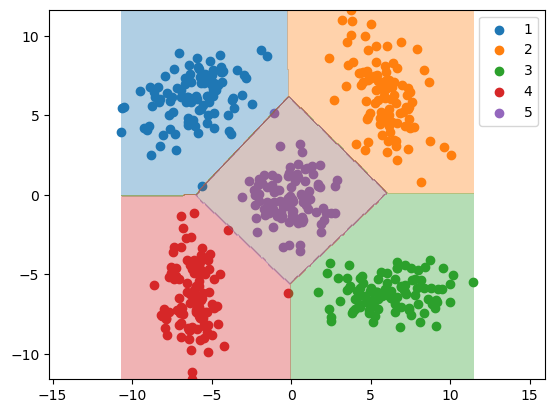

In [182]:
visualisation(test,predi_distance_euclidien)

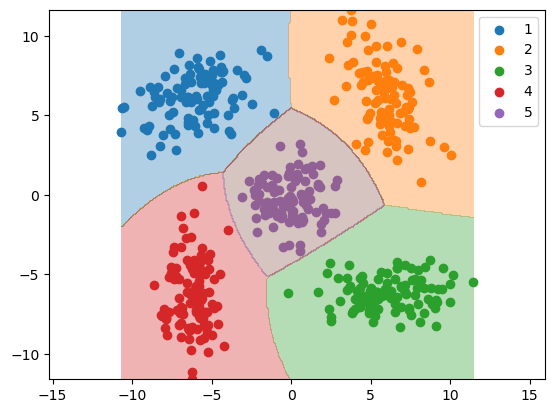

In [184]:
visualisation(test,predi_distance_mahanalobis)

In [91]:
def calcul_matrice(test,methode):
  y=list(test['y'])
  top1=[methode(k)[0] for k in test[['x1','x2']].values.tolist()]  
  top2=[methode(k)[1] for k in test[['x1','x2']].values.tolist()]  
  matrice=[[sum([1 if top1[k]==i and y[k]==j else 0 for k in range(len(y))]) for j in range(1,6)] for i in range(1,6)]
  errer_top1=sum([1 if top1[i]==y[i] else 0 for i in range(len(y))])/len(y)
  errer_top2=sum([1 if top2[i]==y[i] else 0 for i in range(len(y))])/len(y)
  return errer_top1,errer_top2,matrice

In [99]:
calcul_matrice(test,predi_distance_euclidien)

(0.992,
 0.008,
 [[98, 0, 0, 0, 1],
  [0, 100, 0, 0, 0],
  [0, 0, 99, 0, 0],
  [0, 0, 1, 100, 0],
  [2, 0, 0, 0, 99]])

In [190]:
calcul_matrice(test,predi_distance_mahanalobis)

(0.996,
 0.002,
 [[99, 0, 0, 0, 0],
  [0, 100, 0, 0, 0],
  [0, 0, 100, 0, 0],
  [0, 0, 0, 100, 1],
  [1, 0, 0, 0, 99]])

# Dataset 2

In [192]:
data2=pd.read_csv('data/data_tp2_app.txt',names=['y','x1','x2'],sep=" ")
test2=pd.read_csv('data/data_tp2_dec.txt',names=['y','x1','x2'],sep=" ")
u=calcul_moyenne(data2)
cov=calcul_cov(data2)

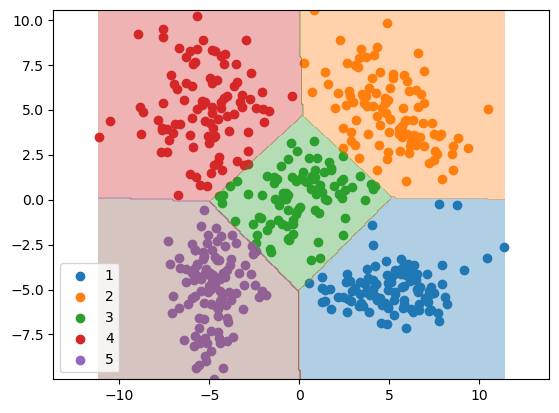

In [194]:
visualisation(test2,predi_distance_euclidien)

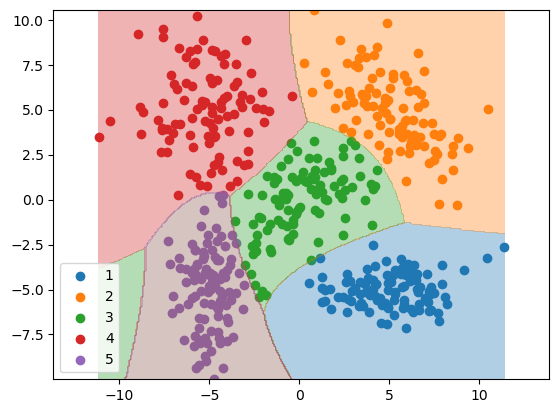

In [196]:
visualisation(test2,predi_distance_mahanalobis)

In [197]:
calcul_matrice(test2,predi_distance_euclidien)

(0.946,
 0.05,
 [[100, 2, 0, 0, 0],
  [0, 97, 5, 0, 0],
  [0, 1, 84, 6, 2],
  [0, 0, 1, 94, 0],
  [0, 0, 10, 0, 98]])

In [198]:
calcul_matrice(test2,predi_distance_mahanalobis)

(0.946,
 0.048,
 [[99, 0, 1, 0, 0],
  [0, 95, 4, 0, 0],
  [1, 5, 88, 3, 5],
  [0, 0, 1, 96, 0],
  [0, 0, 6, 1, 95]])

# Dataset 3

In [208]:
data3=pd.read_csv('data/data_tp3_app.txt',names=['y','x1','x2'],sep=" ")
test3=pd.read_csv('data/data_tp3_dec.txt',names=['y','x1','x2'],sep=" ")
u=calcul_moyenne(data3)
cov=calcul_cov(data3)

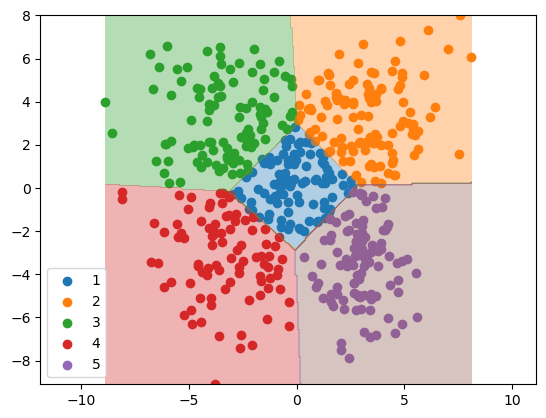

In [210]:
visualisation(test3,predi_distance_euclidien)

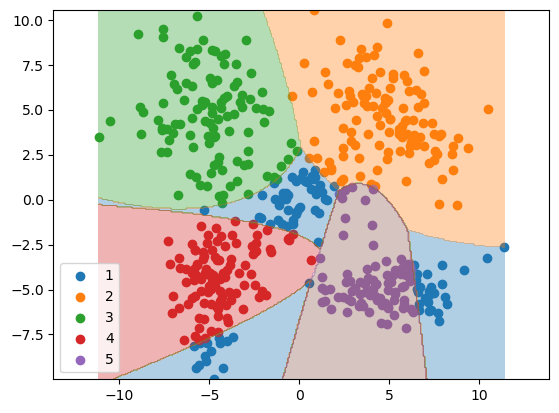

In [211]:
visualisation(test2,predi_distance_mahanalobis)

In [212]:
calcul_matrice(test3,predi_distance_euclidien)

(0.728,
 0.164,
 [[43, 12, 16, 16, 5],
  [17, 83, 4, 0, 9],
  [16, 3, 78, 7, 0],
  [12, 0, 2, 74, 0],
  [12, 2, 0, 3, 86]])

In [214]:
calcul_matrice(test3,predi_distance_mahanalobis)

(0.698,
 0.174,
 [[38, 7, 14, 29, 5],
  [20, 83, 4, 0, 7],
  [17, 5, 81, 10, 0],
  [12, 0, 1, 59, 0],
  [13, 5, 0, 2, 88]])

# Parzen

In [178]:
def parzen_uniforme(data,x):
    dist=[]
    for i in range(1,6):
       c=data[data['y']==i][['x1','x2']].values.tolist()
       dist.append(sum([0.5 if np.linalg.norm(np.array(j)-np.array(x))<1 else 0 for j in c]))
       top1=np.argmin(dist)  
       dist[top1]=max(dist)+1 #je remplace la valeur de top1 par max+1 pour l'exclure
       top2=np.argmin(dist) #je recupere le nouveau top1(qui est en realite le top2)
    return np.argmax(np.array(dist))+1

In [173]:
def parzen_gassien(data,x):
    s=1/((2*np.pi)**(len(x)/2))
    dist=np.array([sum([s*np.exp(-0.5*(np.array(j)-np.array(x)).T@ (np.array(j)-np.array(x))) for j in data[data['y']==i][['x1','x2']].values.tolist()])  for i in range(1,6)])
    top1=np.argmax(dist)  
    dist[top1]=min(dist)+1  #je remplace la valeur de top1 par max+1 pour l'exclure
    top2=np.argmax(dist) #je recupere le nouveau top1(qui est en realite le top2)
    return top1+1,top2+1

In [330]:
def plot_decision_multi2(x1_min, x1_max, x2_min, x2_max, prediction,data="",parametrique=False, sample = 100):
    x1_list = np.linspace(x1_min, x1_max, sample)
    x2_list = np.linspace(x2_min, x2_max, sample)
    if parametrique==True:
       y_grid_pred = [[prediction(data,np.array([x1,x2]))[0] for x1 in x1_list] for x2 in x2_list] 
    else:
        y_grid_pred = [[prediction(np.array([x1,x2]))[0] for x1 in x1_list] for x2 in x2_list] 
    l = np.shape(np.unique(y_grid_pred))[0] - 1
    plt.contourf(x1_list, x2_list, y_grid_pred, levels=l, colors=plt.rcParams['axes.prop_cycle'].by_key()['color'], alpha=0.35)

In [348]:
def visualisation2(test,methode,data="",parametrique=False):
    test=test[['x1','x2']]
    if parametrique==True:
        y_pred=[methode(data,i)[0] for i in test.values.tolist()]
    else:
         y_pred=[methode(i)[0] for i in test.values.tolist()]
    test['y_predi']=y_pred
    for label in range(1,6):
        plt.scatter(test[test['y_predi']== label]['x1'], test[test['y_predi']== label]['x2'], label=label)
    plt.legend()
    plot_decision_multi2(test['x1'].min(),test['x1'].max(),test['x2'].min(),test['x2'].max(),prediction=methode,data=data,parametrique=parametrique)
    plt.axis('equal')
    plt.show()

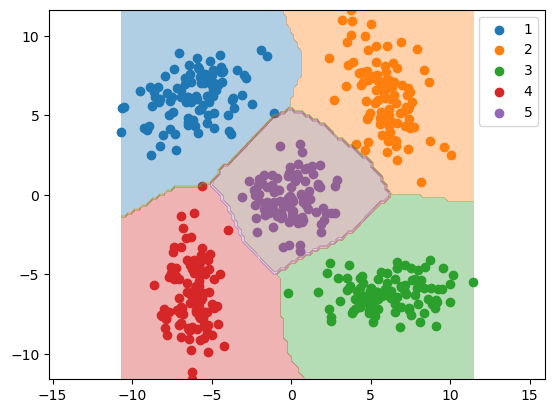

In [350]:
visualisation2(test,parzen_gassien,data1,True)

In [105]:
def calcul_matrice2(data,test,methode):
  y=list(test['y'])
  top1=[methode(data,k) for k in test[['x1','x2']].values.tolist()]  
  # top2=[methode(k)[1] for k in test[['x1','x2']].values.tolist()]  
  matrice=[[sum([1 if top1[k]==i and y[k]==j else 0 for k in range(len(y))]) for j in range(1,6)] for i in range(1,6)]
  errer_top1=sum([1 if top1[i]==y[i] else 0 for i in range(len(y))])/len(y)
  # errer_top2=sum([1 if top2[i]==y[i] else 0 for i in range(len(y))])/len(y)
  return errer_top1,matrice

In [ ]:
calcul_matrice2(data1,test,parzen_uniforme)

# KPPV

In [365]:
def kppv(train,x,k=5):
    t=train.copy()
    t['dist']=[np.linalg.norm(np.array(y)-np.array(x)) for y in train[['x1','x2']].values.tolist()]
    k_voisins=list(t.sort_values('dist')[:k+1]['y'])
    majorite=max([k_voisins.count(i) for i in set(k_voisins)])
    classe=[i for i in set(k_voisins) if k_voisins.count(i)==majorite]
    return classe

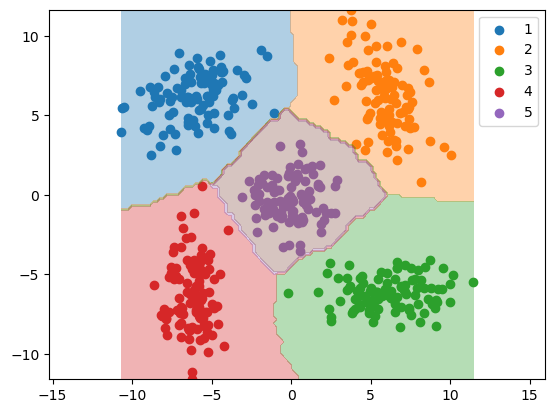

In [367]:
visualisation2(test,kppv,data1,True)